<p style='text-align: center'><a href=https://www.biozentrum.uni-wuerzburg.de/cctb/research/supramolecular-and-cellular-simulations/>Supramolecular and Cellular Simulations</a> (Prof. Fischer)<br>Center for Computational and Theoretical Biology - CCTB<br>Faculty of Biology, University of Würzburg</p>

<p style='text-align: center'><br><br>We are looking forward to your comments and suggestions. Please send them to: <br><br></p>
    
 <p style='text-align: center'>   <a href=andreas.kuhn@uni.wuerzburg.de>andreas.kuhn@uni.wuerzburg.de</a> or <a href=sabine.fischer@uni.wuerzburg.de>sabine.fischer@uni.wuerzburg.de</a></p>

<h1><p style='text-align: center'> Introduction to Julia </p></h1>


## Plots

This lesson will give you an introduction into the `Makie` package for visualizations in Julia. `Makie` is a very powerful data visualization library written in and for Julia. So far `Makie` supports 4 different backends, each serving a different purpose. 

`CairoMakie` is the one used in this lesson. It excels in producing inline static 2D plots for scientific purposes. 

`GLMakie` is the second most important backend. `GLMakie` displays plots in a seperate gpu-rendered window. This makes it less convenient for static plots but comes with the benefit of a much higher performance. Therefore, it is well suited for dynamic and complex visualizations like videos, gifs or interactive animations. 

`WGLMakie` is very similar to `GLMakie`, with the difference that it is running inside a browser, sacrificing some speed towards better portability and compatibility. 

`RPRMakie` is an experimental backend to use raytracing on your GPU. It is quite early in development but can already create beautfiul images: 


<div>
<img src="raytracing.png" width="600"/>
</div>

Tipp: For more beautiful images and examples created with `Makie` visit the page : https://lazarusa.github.io/BeautifulMakie/




In order to make plots with Makie, you have to install and then import the backend you want to use. In this case, this would be  `CairoMakie`. 
All commands that you will learn in this lesson, will also work in `GlMakie` and `WGLMakie`, but the created plots might be in a different format. `RPRMakie` is a little bit more complicated, so for now just be aware of its existence ;). 

In [1]:
using CairoMakie

[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]


## 1. Line Plot - Quick and Dirty

To make a normal line plot, the function `lines()` can be used. A line plot is defined by x and y value pairs. These have to be given in the form of arrays or iterables. One array/iterable for all the x-values and another for all y-values. The x- and y-arrays need to be of the same size. 
The x-values can be omitted, then the y-values are plotted against the iterator `1:length(y-values)`. 

You can assign our plot to a variable. To invoke the plot you can use the `display(plot_name)` function. If the plot is created or called in the last line in a notebook cell, it gets displayed automatically.




Note: The first plot in Makie ( also in any other plotting package) can take much more time than the following plots. This is due to the JIT-Complier (Just in Time) of Julia and it is a well known [problem]( https://www.google.com/search?client=firefox-b-e&q=julia+first+time+to+plot). But this has been significantly improved with Julia 1.9.0 and above. So if you are still running an older version of Julia, its time to upgrade ;).  

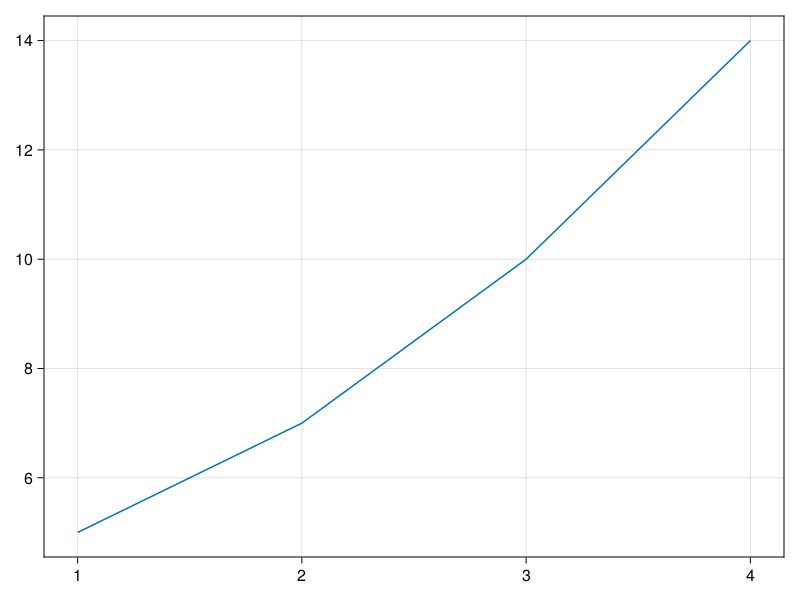

In [2]:
input = [5,7,10,14]
f = lines(input) 
display(f)

You can save our figures with the `save()` function. The first argument is the name of the file you want to create. The second argument is the figure itself. With the ending of the file name (`.png, .svg or .pdf`) you control the type of the output file.

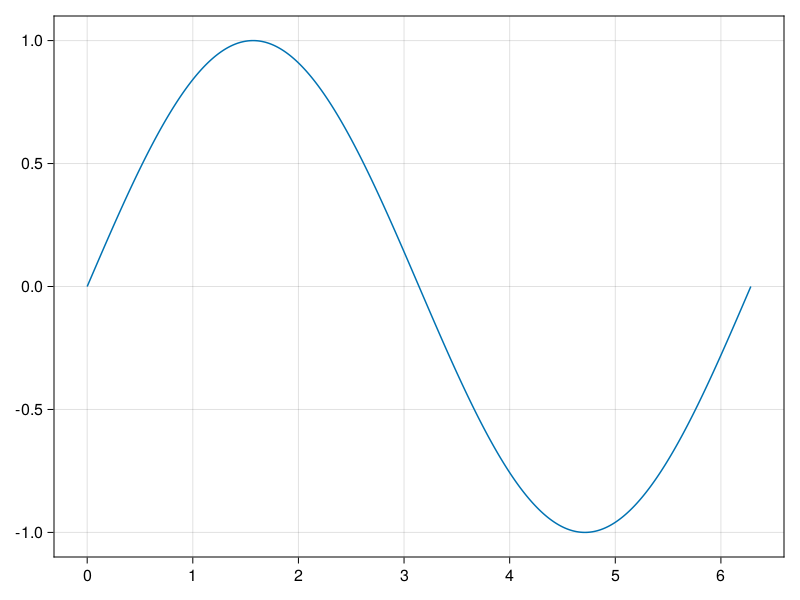

In [3]:
x = range(start = 0,stop = 2π, length = 1000)
# hint: to write π in Julia type \pi and press tab
y = sin.(x)
f2 = lines(x,y)
save("f2.png", f2)
save("f2.pdf", f2)
save("f2.svg", f2)
f2

Now you have created and saved your first plot. But a plot without title and labeled axes is more or less useless. To give a plot a title and labels you will have to dig a little deeper into the inner workings of Makie.
So far you have used the `line()` function. This function does a lot of stuff for you automatically (creating a figure-, axis- and a plot- object). This is very convenient when ploting something quick and dirty. But to use `Makie` to its full potential, it is better to do some of the stuff manually. 

## 2. How to properly create Figures

At first, you have to create a figure object with the `Figure()` function. A figure is the top object in Makie, it serves as the input argument to the top level functions `display` and `save` that you have already used. It has one keyword argument worth mentioning : `resolution` which defines is size. 

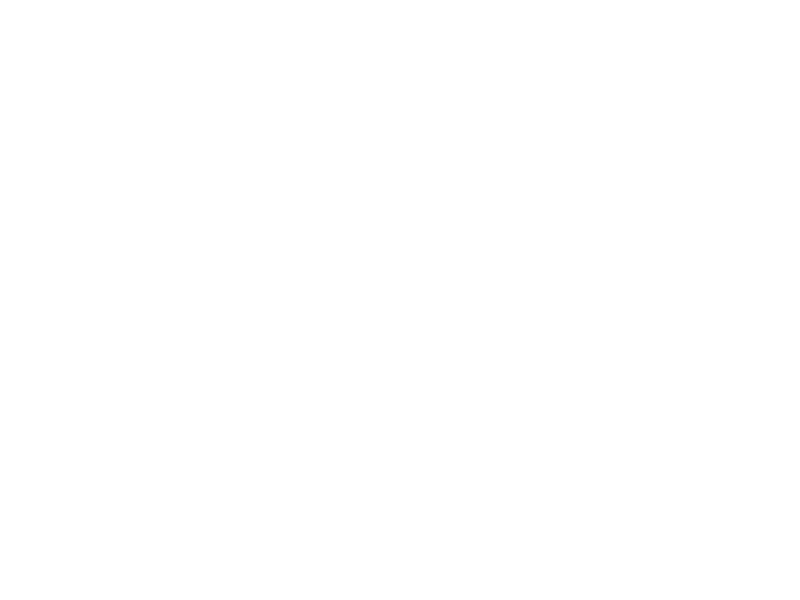

In [4]:
f3 = Figure()

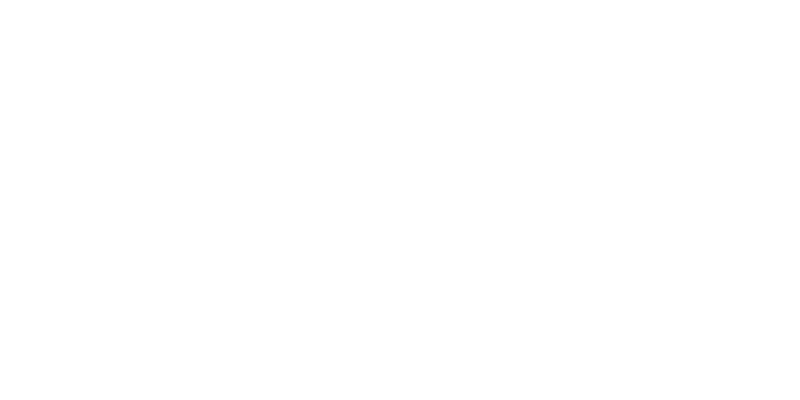

In [5]:
# create figure f4 with a fixed resolution
f4 = Figure(resolution = (800,400))

## 3. Adding axes to a Figure

As seen in the cells above, the created figures do not contain anything. Therefore we have to create axes in the figures with the `Axis()` function.

__Note: One figure can have multiple axes but every axes is only part of one figure.__

The `Axis()` function needs the figure in which it should be created and its relative position inside the figure, as a positional argument. The first axis in every figure should always be created on the first y- and x-position: `figurename[1,1]`.  If you want mutiple axis in one figure you can add more axis in either the y or x direction with  `figurename[y,x]`. Makie will scale the axes automatically to even sizes.

The keyword argument `title` can be used to assign an axis a title. 

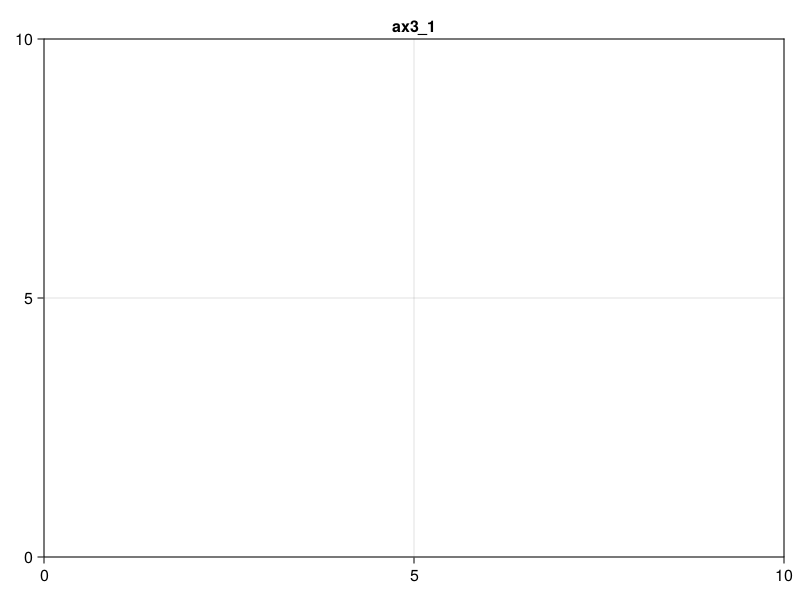

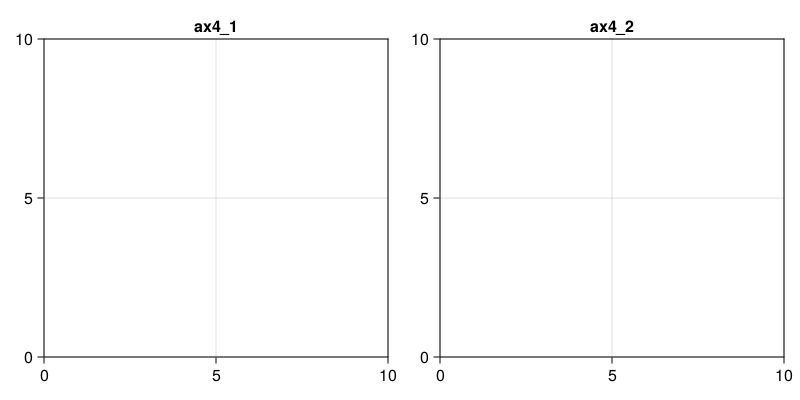

In [6]:

ax3_1 = Axis(f3[1,1],title = "ax3_1")
display(f3)
ax4_1 = Axis(f4[1,1],title = "ax4_1")
#add another axis to figure f4
ax4_2 = Axis(f4[1,2],title = "ax4_2")
display(f4)

Note: There are a lot of [keyword arguments](https://docs.makie.org/stable/examples/blocks/axis/), for the `Axis()` function to modify title, scale, link, change x & y, limits,...  

In the cell above,  one axis was created in f3 and two axes were created in f4. All these axes have been asigned a name to access them easier in the future. There are a lot more [keyword arguments](https://docs.makie.org/stable/examples/blocks/axis/) that can be used to modify an axis. This can done during creation in the `Axis()`  function or  later by using the `axis.keyword_argument = ` syntax. Some of the important ones are:   `xlabel, ylabel, title, xlabelsize, ylabelsize, titlesize , backgroundcolor`. 



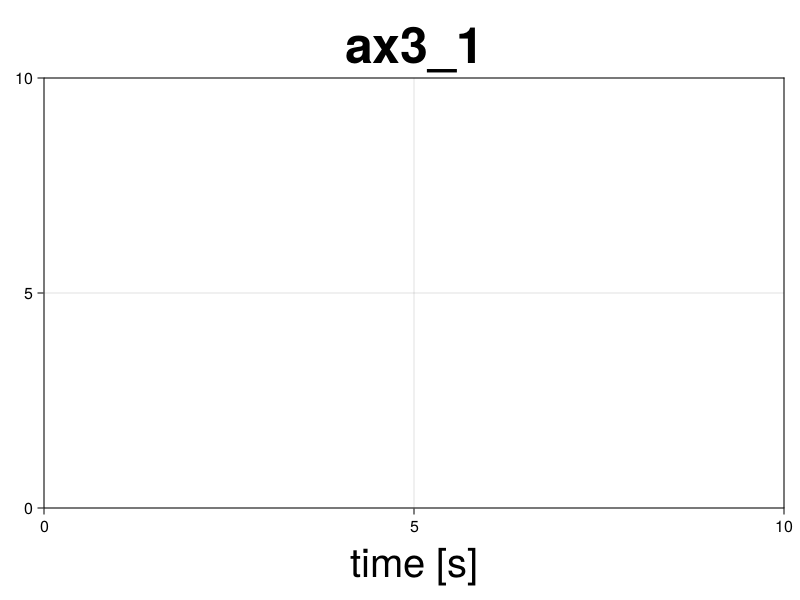

In [7]:
ax3_1.xlabel = "time [s]" 
ax3_1.xlabelsize = 40
ax3_1.titlesize = 50
f3

__Warning__: 

If you have executed the cells above more than once, you might run into strange behaviour, as `Makie` does not automatically delete old axes when creating new ones with the same name. Old axes might still exist but don't have a name asigned to them anymore (very bad! ).  
You can avoid that, by either always creating figures and axes together in one cell or by deleting old axes before creating new axes with the `delete(axis)`  function.

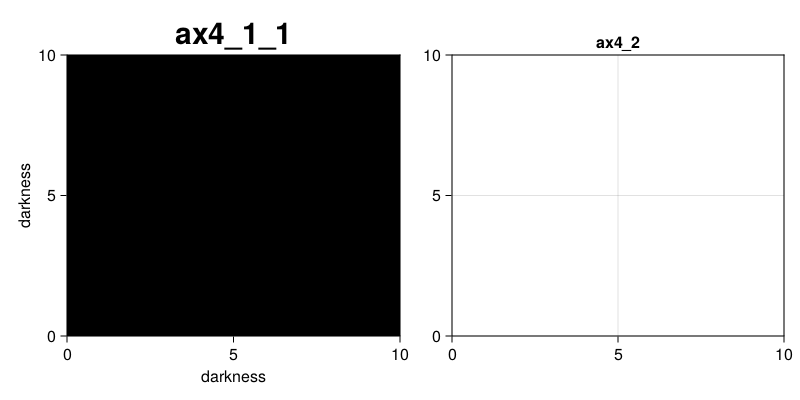

In [8]:
delete!(ax4_1)
ax4_1_1 = Axis(f4[1,1],title = "ax4_1_1", titlesize = 30, backgroundcolor = "black",ylabel = "darkness",xlabel ="darkness")
f4

## 3. Ploting into an axis 

Now you can finally start to plot into your created axes. You can use one of the many [plotting functions](https://docs.makie.org/stable/examples/plotting_functions/) that are provided by `Makie`. Some of the most important ones are `lines!(), scatter!(), hist!(), heatmap!() `. These functions create a plot into a given axis, if the axis is omitted then the last used axis is the default value.  If you want to modify a plot later on,  it makes sense to assign it to a variable as well (but you don't need to). 


Comment: Makie also follows the Julia convention to end function names of mutation functions with `!`. As the `lines()` function created a new figure, axis and plot object, whereas the `lines!()` only modifies an already existing axis, by adding a plot. 

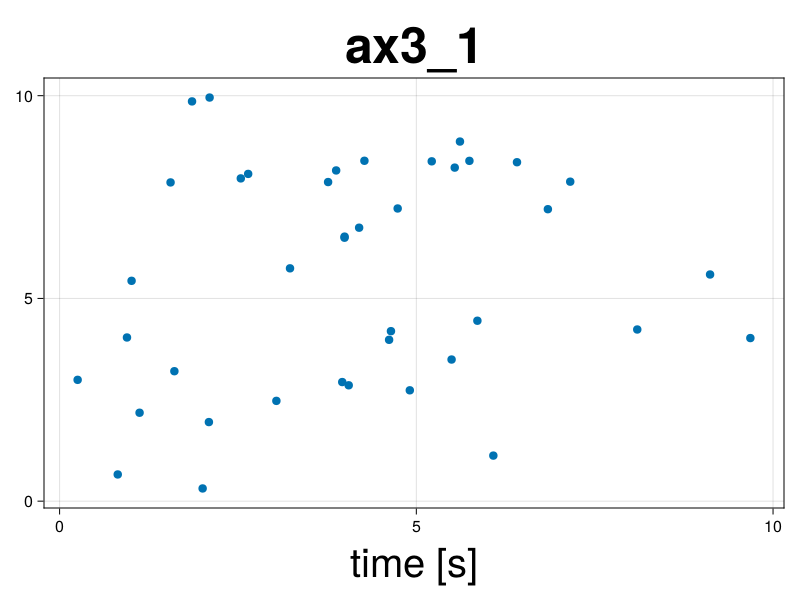

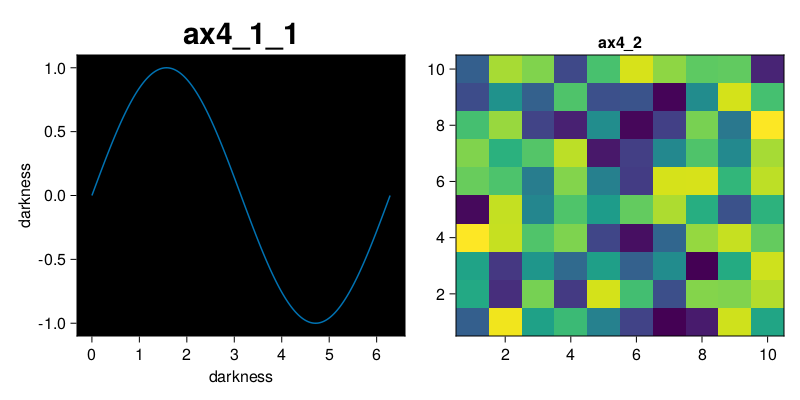

In [9]:
scatty =  scatter!(ax3_1, 10*rand(40),10*rand(40))
liney = lines!(ax4_1_1,x,y,label = "sinus")
heaty = heatmap!(ax4_2, rand(10,10),label = "random")
display(f3)
display(f4)


Similar to axes: Old plots are not deleted if a new one is created in its place and name. They still exist but don't have a name asigned to them anymore (very bad! ).  
To avoid such problems, either created figure, axes and plots together or delete old plots with `delete!(axis, plot)` and old axes with `delete(axis)`

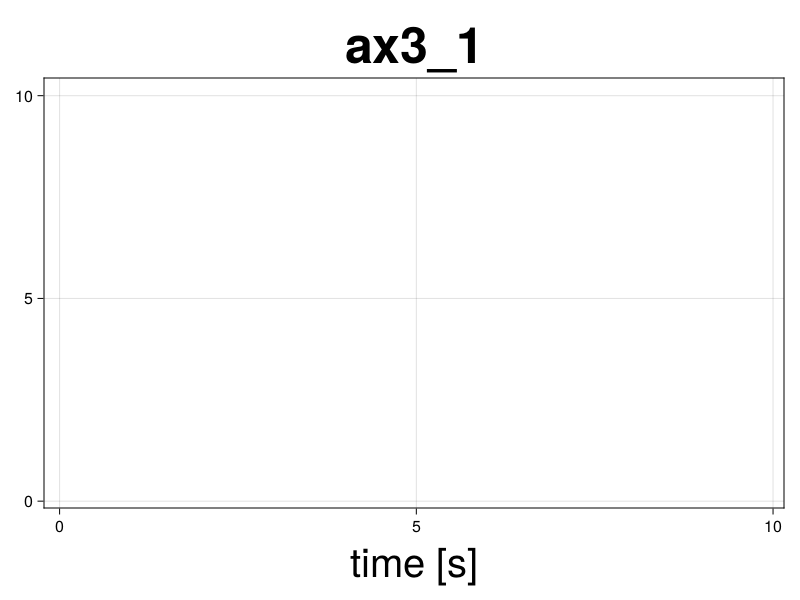

In [10]:
delete!(ax3_1,scatty)
f3

The different plot functions `(lines!(), scatter!(),...)` also have a lot of keyword arguments like `label, linewith, marker, markersize, color ... `.  Similar to axes, these keyword arguments can be provided during during creation or later with the `plot_name.keywordargument = ` syntax.

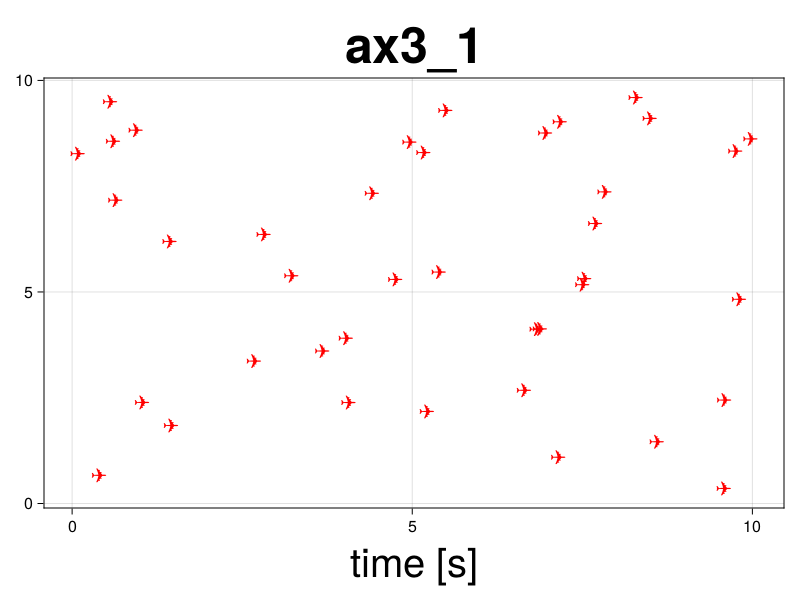

In [11]:
#adding keyword arguments during creation
scatty2 =  scatter!(ax3_1, 10*rand(40),10*rand(40),marker = '✈', color = :red,markersize = 20, label = "airplanes")
#f3
f3

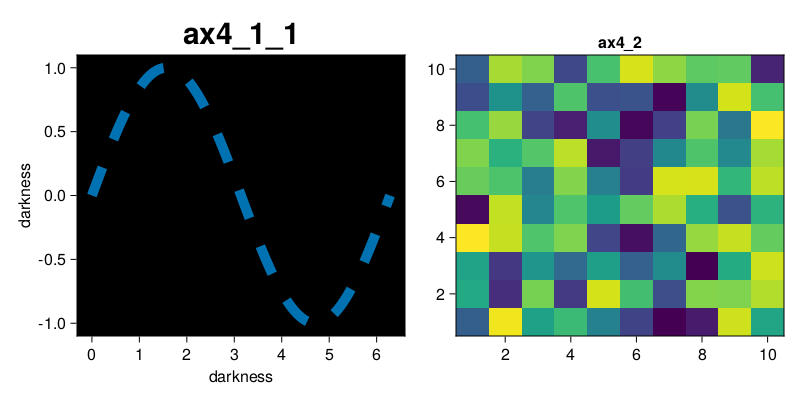

In [12]:
# adding keyword arguments after creation 
liney.linewidth = 10
liney.linestyle = :dash
display(f4) 

#### 4. Making a legend 

Automatically created legends in `Makie`, are always linked to an axis. Every plot inside said axis that has been assined a  `label`, will appear inside the legend. 

There are two different ways to place a legend. You can either create a legend outside of an axis with the `Legend()` function. 
The arguments of this function are: First,the relative position inside the figure and second, the axis to which the legend is refering. A thrid optional argument is a string, which will be used as the title of the legend.  

If you want to create a legend inside an axis, you also can use the `axislegend` function. In this case you only have to supply the axis to which the legend refers.  

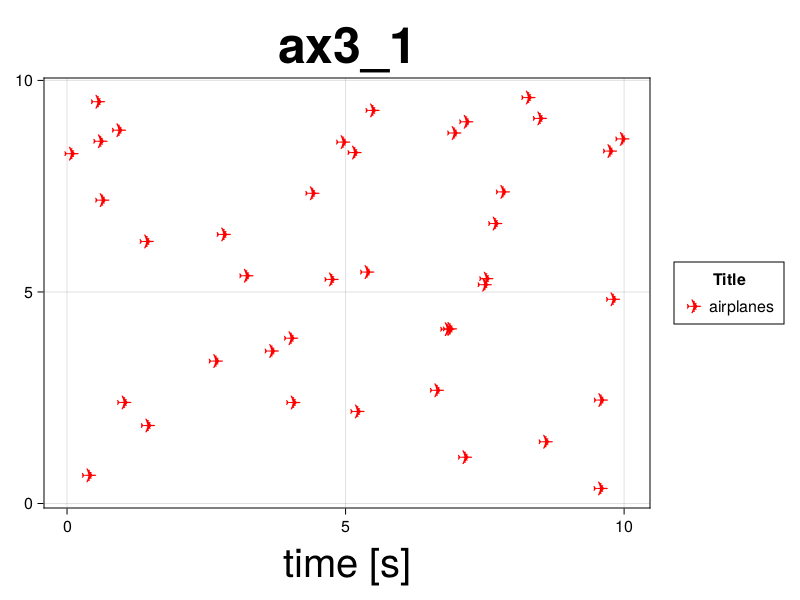

In [13]:
leggy = Legend(f3[1,2],ax3_1,"Title")
f3

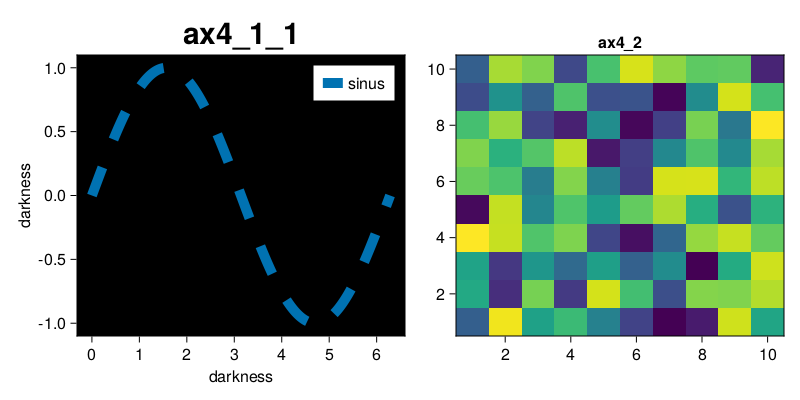

In [14]:
axislegend(ax4_1_1)
f4

All the legends shown so far, used the `labels` of the plots. It is also possible to manually write text into a legend or only use ever second plot, etc. . Everything regarding legends can be found [here](https://docs.makie.org/stable/examples/blocks/legend/).

Another important keyword argument of many plotting function is `color` keyword argument.

If you change the color of a plot, an automatically created legend gets updated as well :). 

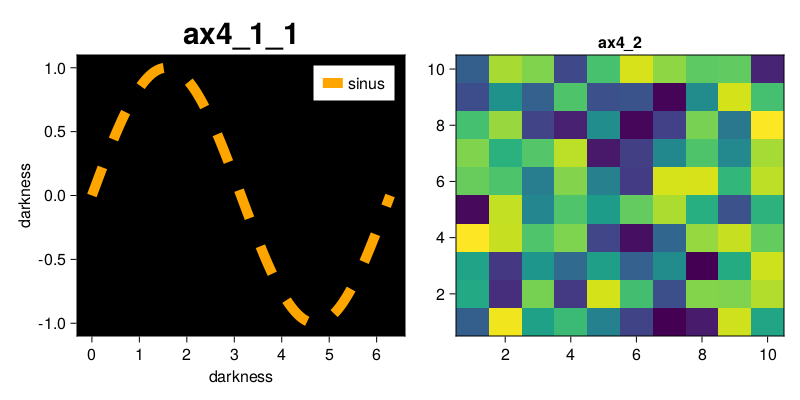

In [15]:
liney.color = "orange1"
f4

Note: All available colors can be found [here](http://juliagraphics.github.io/Colors.jl/stable/namedcolors/)

### 5. Everything comes together 

In the cell below you can see the step by step creating of a figure with two plots, one axis and a legend.  This is the way you should create your plots from now on:  

#### 5.1 Line Plot

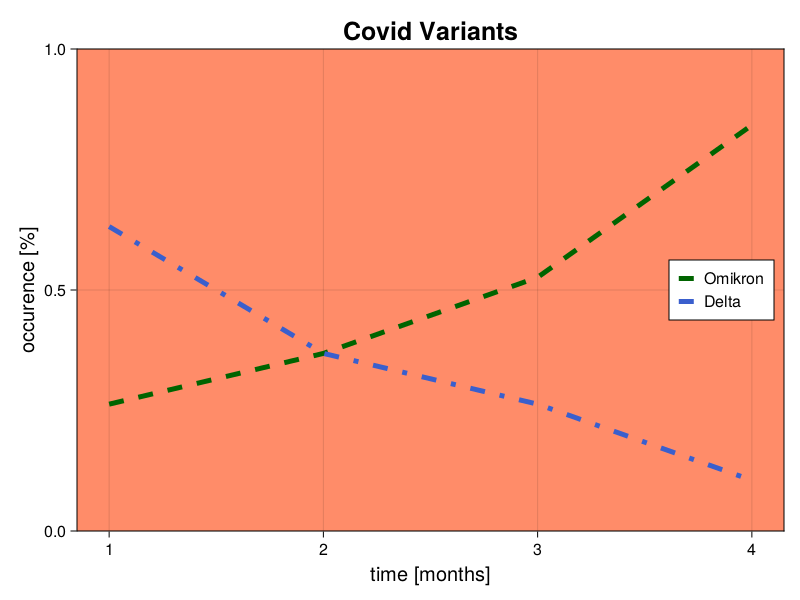

In [16]:
x1,y1 = [1,2,3,4],[5,7,10,16]./19
x2,y2 = [1,2,3,4],[12,7,5,2]./19

f5 = Figure()
ax5_1 = Axis(f5[1,1],title = "Covid Variants", titlesize = 25, backgroundcolor = "salmon1",
    ylabel = "occurence [%]",xlabel ="time [months]",
    xlabelsize = 20, ylabelsize = 20) 
line5_1_1 = lines!(ax5_1, x1 ,y1, label = "Omikron", linestyle  = :dash, color = "darkgreen",linewidth = 5)
line5_1_2 = lines!(ax5_1, x2, y2, label = "Delta", linestyle  = :dashdot, color = "royalblue3",linewidth = 5)
axislegend(ax5_1,position = :rc)  # positon is keyworded by two things r or l (right or left) and t,c,b (top, center, bottom) 
#setting ylimit after creating plot 
ylims!(ax5_1,0,1.0)
f5

#### 5.2 Bar Plot
Bar plots are one of the most common types of graphs, which allow you to show data associated with the categorical variables. In Makie `barplot!()` is the function for this purpose. This function takes the arguments: `(axis, x, y)`. Supported [keyword arguments](https://docs.makie.org/stable/examples/plotting_functions/barplot/) include, `color, strokecolor , strokewidth`,... . To customize the x-axis to for categories instead of coordinates, you can use the keyword argument `xticks(x, categories)`, which maps coordinates to an equally long sequences of categories. 

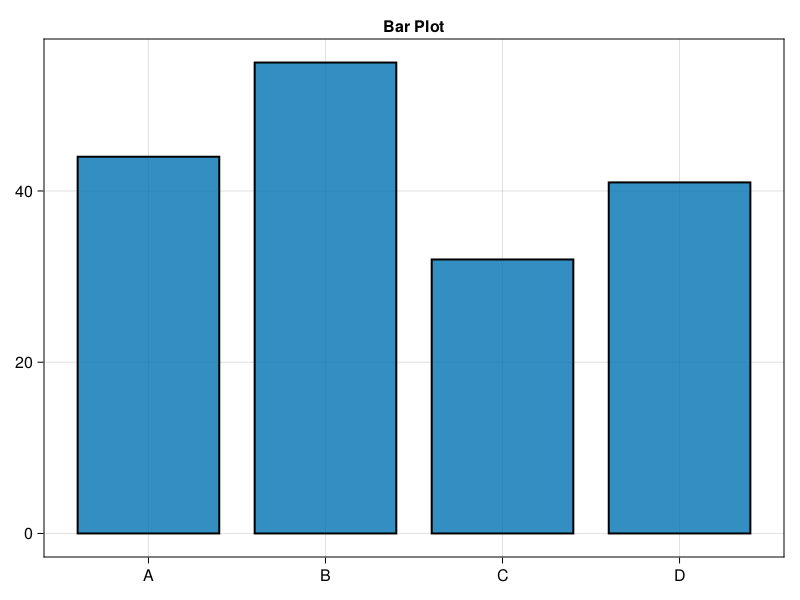

In [17]:
category=["A", "B", "C", "D"]
x_range = 1:length(category)
values=[44,55,32,41]

f6 = Figure()
ax6_1 = Axis(f6[1, 1], xticks = (x_range, category), title = "Bar Plot")
bari6_1 = barplot!(ax6_1, x_range,values, strokecolor = :black, strokewidth = 2)

f6

#### 5.3 Colors
Makie automatically asigns a new color to a new plot. In many cases this can be sufficient to colorise  a plot. Like here, where 4 different barplots are created in in one axis.


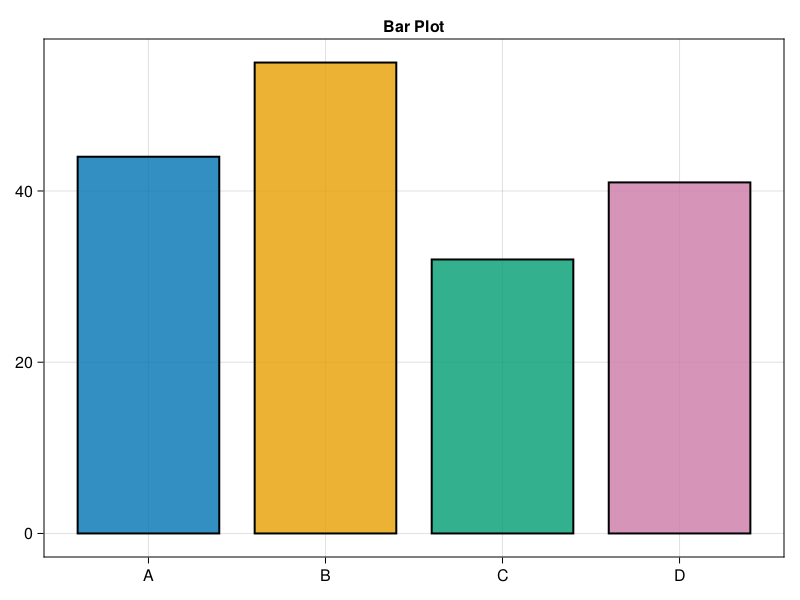

In [18]:
category=["A", "B", "C", "D"]
x_range = 1:length(category)
values=[44.0,55,32,41]

f7 = Figure()
ax7_1 = Axis(f7[1, 1], xticks = (x_range, category), title = "Bar Plot")
for i in x_range
    barplot!(ax7_1, [i],[values[i]], strokecolor = :black, strokewidth = 2) 
    # Hint:  you have to write [i] and [values[i]] instead of i and values[i] as makie can only work with arrays or iterabales as input not with numbers
end
f7

But it is also possible to change the color of each bar/scatter/vector/linesegment in a single plot seperately. In this case you need to provide a vector of colors to the keyword argument `color` with the same length as our datapoints.  

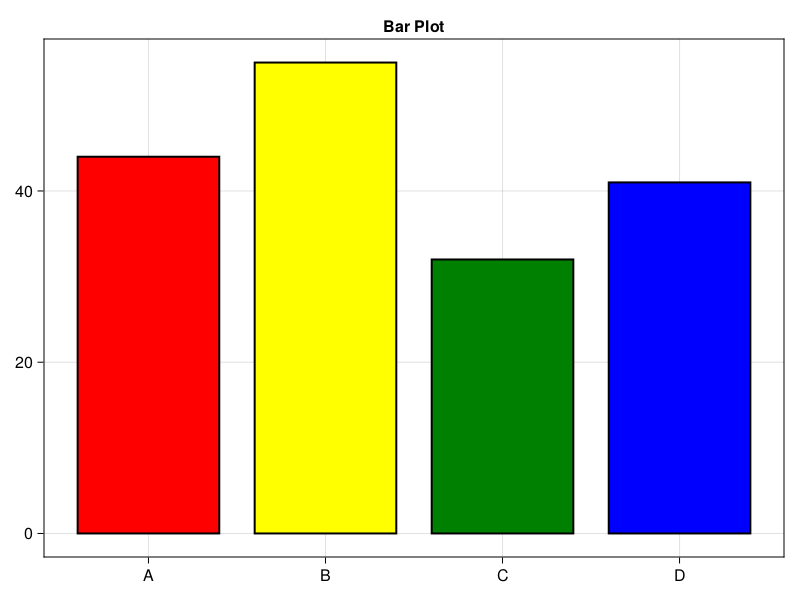

In [19]:
category=["A", "B", "C", "D"]
x_range = 1:length(category)
values=[44,55,32,41]
color_vec = ["red","yellow","green","blue"]

f8 = Figure()
ax8_1 = Axis(f8[1, 1], xticks = (x_range, category), title = "Bar Plot")
bari8_1 = barplot!(ax8_1, x_range,values, strokecolor = :black, strokewidth = 2,color = color_vec)

f8

But this can become quite anoying for many datapoints. Therefore, you can also use predefined vectors of colors from the package `ColorSchemes`. 

In [20]:
import ColorSchemes as co

Now you can access the vast catalog of possible [colorvectors](https://juliagraphics.github.io/ColorSchemes.jl/stable/catalogue/).

Just some examples below: 

In [21]:
co.glasbey_hv_n256

In [22]:
co.ocean

In [23]:
co.prism

You can provide a slice of every predefined colorvectors to the `color` keyword argument. 

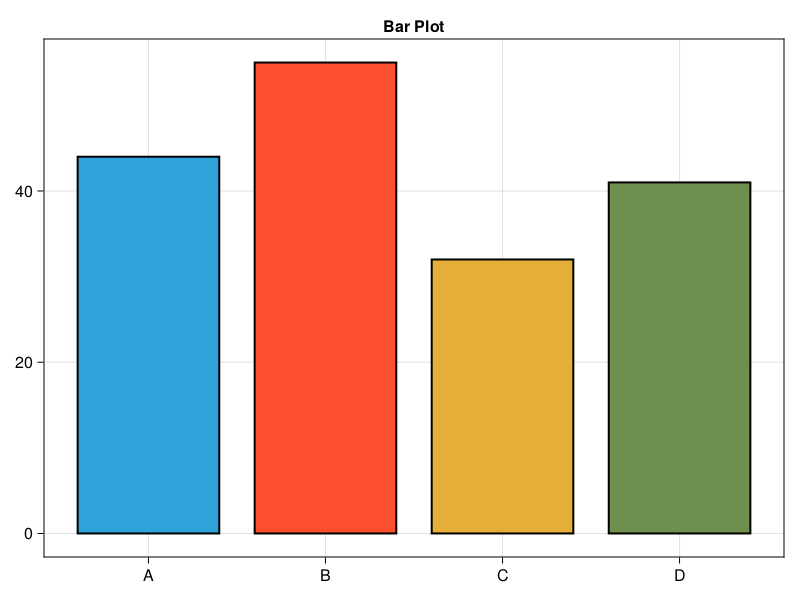

In [24]:
category=["A", "B", "C", "D"]
x_range = 1:length(category)
values=[44,55,32,41]

#slicing the color vector to the range we need in our plot: 

#color_vec = co.prism[x_range]
color_vec = co.glasbey_hv_n256[x_range]

f9 = Figure()
ax9_1 = Axis(f9[1, 1], xticks = (x_range, category), title = "Bar Plot")
bari9_1 = barplot!(ax9_1, x_range,values, strokecolor = :black, strokewidth = 2,color = color_vec)

f9

__Note: Everything what you have learned here, regarding colors is true for every type of plot in Makie not only barplots.__

#### 5.4 Errorbars
Makie has its own `errorbars!()` ploting function, which can be used on top of every type of plot. Its positional arguments are `x, y, and error`. It also has some [keyword arguments](https://docs.makie.org/stable/examples/plotting_functions/errorbars/) like `whiskerwidth` which defines the size of the horizontal line on top and `direction` which is `:y` per default,  but can be changed to `:x` to plot errors in the x-direction. 

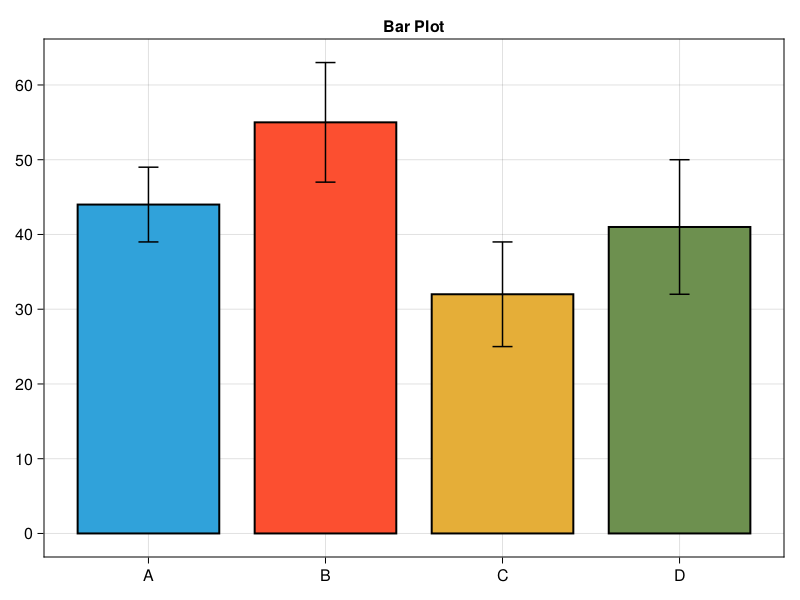

In [25]:
category=["A", "B", "C", "D"]
x_range = 1:length(category)
values=[44,55,32,41]

#color_vec = co.prism[x_range]
color_vec = co.glasbey_hv_n256[x_range]

f10 = Figure()
ax10_1 = Axis(f10[1, 1], xticks = (x_range, category), title = "Bar Plot")
bari10_1 = barplot!(ax10_1, x_range,values, strokecolor = :black, strokewidth = 2,color = color_vec)

# adding error and erro bar plot
error=[5,8,7,9]

erri6_1 = errorbars!(ax10_1, x_range,values, error,whiskerwidth = 20)
f10

### 5.5 Histograms

Histograms are a very common type of plot, where data is plotted against its frequency. Histograms are a very usefull tool to visualize the distribution of measured data, like normal-distributed, uniform-distributed etc. In `Makie` histograms are created with the function `hist!()`, which takes an array of values as input argument. The most important keyword argument is `bins` which is the number of bins to be drawn. Further optional arguments are `normalization = :pdf`, which rescales the data to a probability density function, where all probabilties sum up to 1. Many more keyword arguments like  `Color`, `strokewidth` , `strokecolor` can be found [here](https://docs.makie.org/stable/examples/plotting_functions/hist/).  

To create some artifical data for plotting the package `Distributions` is used.  Together with the `rand()` function, it is possible to sample values from a huge number of [probability distributions](https://juliastats.org/Distributions.jl/stable/univariate/#Continuous-Distributions). In this case 10000 data points are sampled from a Normal distribution `Normal(0,2)` with `mean = 0` and `variance = 2`. 

In [26]:
using Distributions

In [27]:
dist_data = rand(Normal(0,2),10000)

10000-element Vector{Float64}:
  0.439183692255416
 -0.729239310946436
  3.552149968226252
  0.8040907268903124
  2.453855315387867
  0.1628235102868887
 -0.5666480981299077
 -1.1042464187558672
 -2.1624777994311724
 -0.14688937521851975
  0.8186365969079598
 -0.5116615678105526
  5.461271228488678
  ⋮
 -2.812493846557321
 -4.167837183541836
 -1.9863179990941384
  1.1766694642132647
  1.0961807750853263
  0.23584137755475754
 -1.2895836930370395
 -0.16341263280722154
 -2.5119243503307715
  2.467845690341833
  1.5977627990289822
 -0.31863977603425986

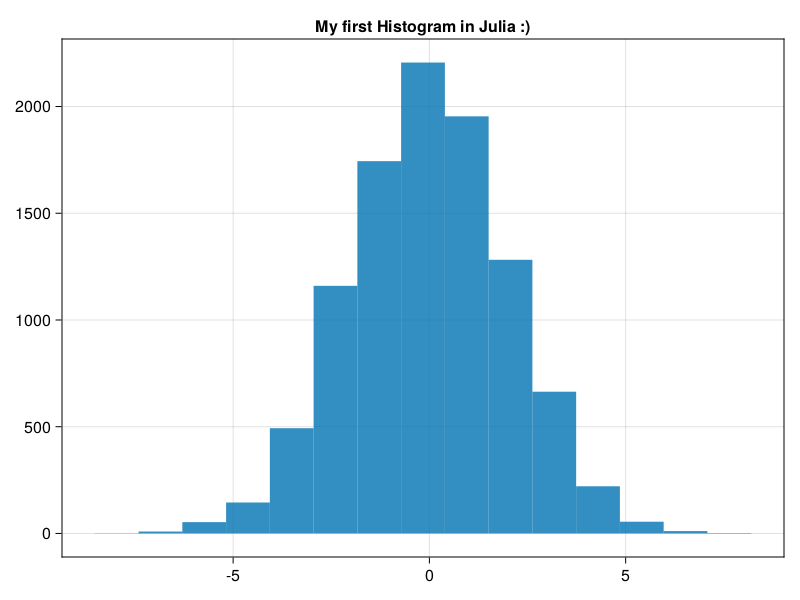

In [28]:
f11 = Figure()
ax11_1 = Axis(f11[1, 1], title = "My first Histogram in Julia :)")
histi11_1 = hist!(ax11_1, dist_data, )
f11

Now, you can make the plot look nicer with all the tools you have learned so far. 


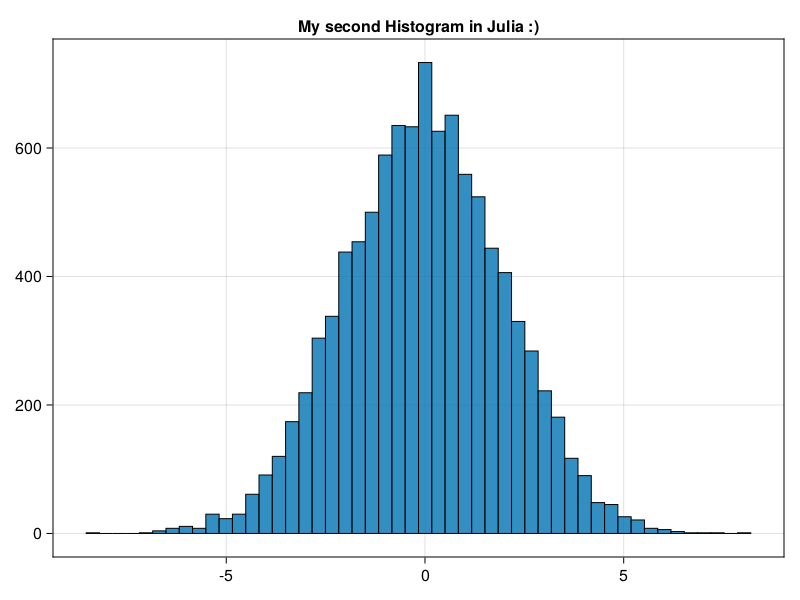

In [29]:
f12 = Figure()
ax12_1 = Axis(f12[1, 1], title = "My second Histogram in Julia :)")
histi12_1 = hist!(ax12_1, dist_data, bins = 50,strokewidth = 1, strokecolor = :black )
f12

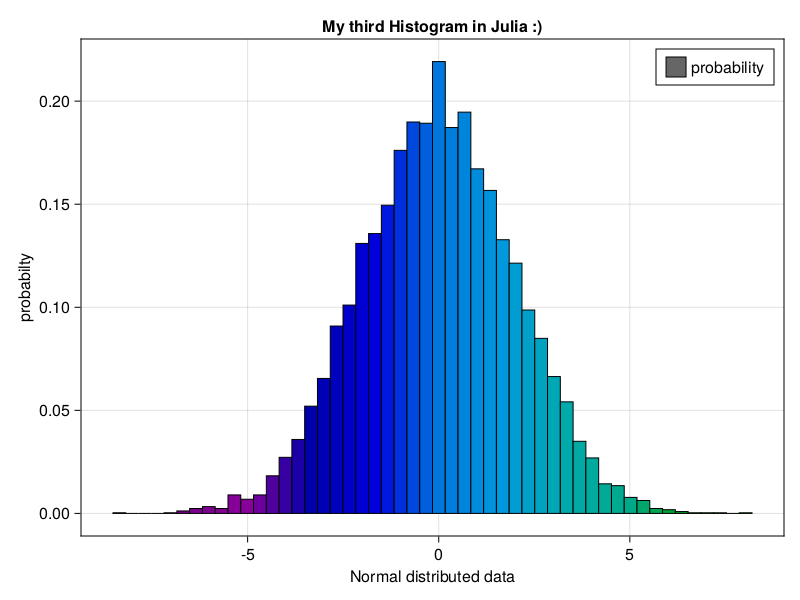

In [30]:
f13 = Figure()
ax13_1 = Axis(f13[1, 1], title = "My third Histogram in Julia :)",xlabel = "Normal distributed data",ylabel = "probabilty")
histi13_1 = hist!(ax13_1, dist_data, bins = 50,strokewidth = 1, strokecolor = :black, normalization = :pdf, color =co.nipy_spectral[1:50], label = "probability" )
axislegend(ax13_1,position = :rt)
f13

### 6. Box-Whisker Plot
Like a histogram a box-whisker plot is a way to graphically show the distribution of values. In `Makie` the function `boxplot!()` leads to a box-whisker plot. `boxplot()` needs is the input data in form of two arrays one where to position on the x-axis is marked for every data point and one for the value of every datapoint. Optional keyword arguments can costumize the plot, for example you can make a horizontal box plot with `orientation:horizontal`. More keyword arguments can be found [here](https://makie.juliaplots.org/stable/examples/plotting_functions/boxplot/).

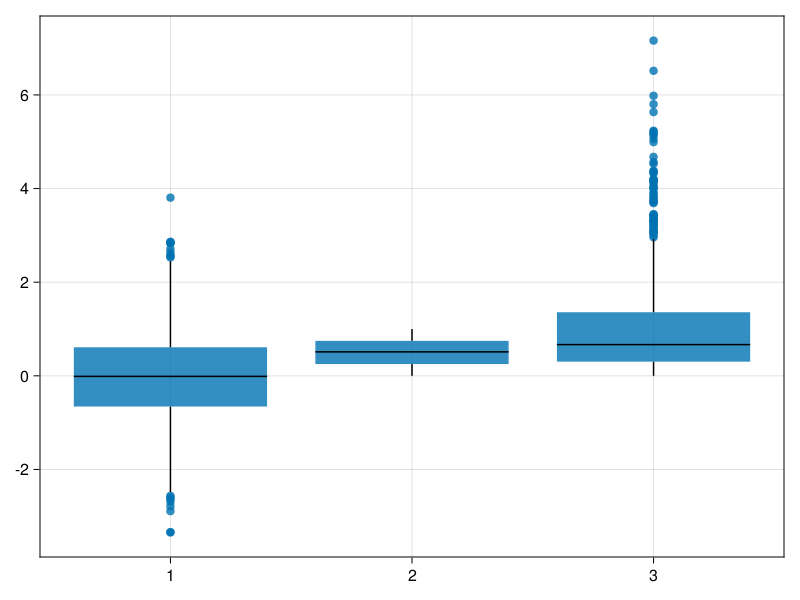

In [31]:
data_points = 1000

y1 = rand(Normal(),data_points)
y2 = rand(Beta(),data_points)
y3 = rand(Erlang() ,data_points)
xs = [1 for i in 1:data_points]


xs = append!(xs,xs.*2,xs.*3)
ys = append!(y1,y2,y3)

boxplot(xs,ys)

## Exercises

#### <p style='color: green'>  Always make pretty plots (title, axis labeling, nice colors, legend, axis limits, grid (where appropriate), ...) !!!</p>

Execute the first cell to get some data that you can plot.

In [32]:
# you will learn how this function works in the next chapter import/export
# don't worry for now and just execute this cell 

function Julia_parser(path::String)
    eval(Meta.parse(readline(path)))
end

averagetemp_Station3 = Julia_parser("Temperatur_Station3.json")
averagetemp_Station44 = Julia_parser("Temperatur_Station44.json")
averagetemp_Station73 = Julia_parser("Temperatur_Station73.json")
rainfall_Station3 = Julia_parser("Niederschlag_Station3.json")
rainfall_Station44 = Julia_parser("Niederschlag_Station44.json")
rainfall_Station73 = Julia_parser("Niederschlag_Station73.json")



Histolist = rand(Normal(100,15),100000)
loglist=[exp(-i*0.1) for i in range(1,81)]
Months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"];


### <p style='color: green'>easy</p>

1. Plot average temperatures per month at the three different stations against the months in three different figures as lines plots together with a legend.

2. Plot average temperatures per month at the three different stations against the months in three different scatter plots with different colors but into the same figure. 

3. Make a bar plot of the rainfall per month at station 3.

4. Make a boxplot of the temperatures at each station.

### <p style='color: orange'>medium</p>

5. Make a histogramm of `Histolist`, wich contains generated data of an IQ distribution, with `100` bins. 

    Add a black vertical line at `100`. 

    Hint: There is a very useful predefined function for vertical lines in makie. Check the [documentation]( https://docs.makie.org/stable/examples/plotting_functions/) to save you a lot of work.

6. Use the makie documentation to study the additional keyword arguments for `hist()`. Use this to make  a histogram using the same data as in 5., but plot the probabilty density instead of the frequency of the IQ , `20` bins, a nice looking stroke and change one additonal feature of your desire.

7. Look at the offical documentation of [themes](https://docs.makie.org/stable/documentation/theming/) in Makie. Choose one of the [predefined theme](https://docs.makie.org/stable/documentation/theming/predefined_themes/) which you find the most beautiful and activate it with the function `set_theme!()`. Recreate some of the plots in the previous exercises. 
Use the function `update_theme!()` to change one or more settings of the theme to customize it for your needs. 

8. Make a plot of `loglist`, which could resemble the decline of something over time (just come up with something for your labels), without and with a logarithmic y-axis (use the documentation).

### <p style='color: red'>hard</p>

9. Make a diagram in wich `averagetemp_Station73` are plotted as a line graph and `rainfall_Station73` is plotted as a bar graph. Try to get the axis for rainfall on the right and for temperature on the left side of the diagram. Check the [documentation](https://docs.makie.org/stable/examples/blocks/axis/#creating_a_twin_axis) of twinaxis, to find out how.     

10. Make a plot with the rainfall of all three stations in one bar graph where the three different bars are shown for every month and without grid. Check the [documentation](https://docs.makie.org/stable/examples/plotting_functions/barplot/) of barplots, to find out how.     